# **Test Kolmogorov**

In [7]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm
from scipy.stats import ks_2samp
from statsmodels.distributions.empirical_distribution import ECDF
import time
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Generar los datos de ejemplos
np.random.seed(42)
datos=np.random.normal(loc=0,scale=1,size=100)
# Resultado el test 
resultado=kstest(datos,'norm')
print("Estadístico KS:", resultado.statistic)
print("Valor p:", resultado.pvalue)

Estadístico KS: 0.10357070563896065
Valor p: 0.2180555337851624


* El valor p mide la probabilidad de observar una discrepancia tan grande como la obtenida (o mayor), bajo la   hipótesis nula 
    H0 : La muestra sigue la distribución teórica.

* En general, si el valor 
p<0.05, se rechaza la hipótesis nula y concluimos que la muestra no sigue la distribución teórica.

* Si p ≥ 0.05, no hay suficiente evidencia para rechazar la hipótesis nula, por lo que podemos considerar que la muestra sí podría seguir la distribución teórica.

En tu caso, p=0.218, que es mayor a 0.05, por lo que no hay evidencia suficiente para rechazar la hipótesis nula. Esto significa que los datos de tu muestra son consistentes con la distribución teórica que estás comparando.

In [6]:
# Generar dos muestras
muestra1 = np.random.normal(0, 1, 100)
muestra2 = np.random.normal(0.5, 1, 100)

# Realizar el test KS para dos muestras
resultado = ks_2samp(muestra1, muestra2)

print("Estadístico KS:", resultado.statistic)
print("Valor p:", resultado.pvalue)


Estadístico KS: 0.3
Valor p: 0.0002248739317492479


Estadístico KS: Mide la máxima diferencia entre las distribuciones acumulativas.

Valor p:

* Si p<0.05, se rechaza la hipótesis nula, indicando que las distribuciones son significativamente diferentes.
* Si p≥0.05, no hay evidencia suficiente para rechazar la hipótesis nula.

Usa el test de KS cuando te interese evaluar si dos distribuciones son similares o si una muestra sigue una distribución esperada, especialmente en situaciones donde los supuestos de normalidad no se cumplen.

In [8]:
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/'
       'Estadistica-machine-learning-python/master/data/Snmesp.csv')
datos = pd.read_csv(url)
datos['year'] = datos['year'].astype(str) 
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1476 non-null   object 
 1   salary  1476 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.2+ KB


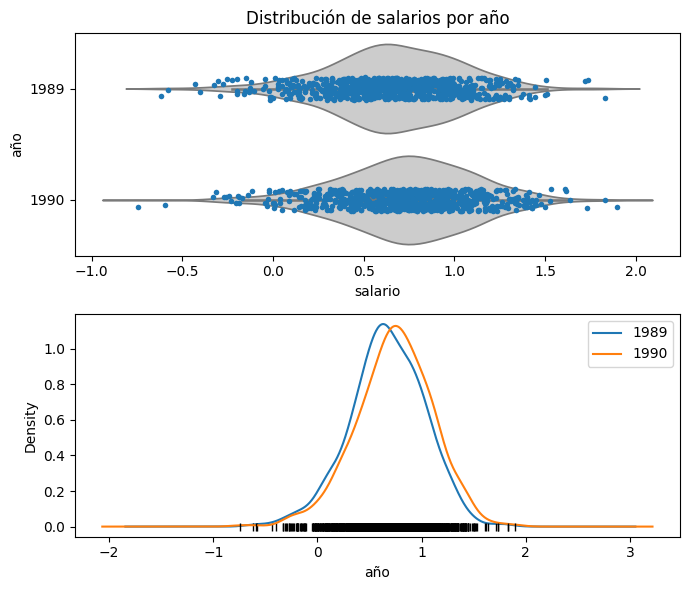

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 6))
sns.violinplot(
    x     = datos.salary,
    y     = datos.year,
    color = ".8",
    ax    = axs[0]
)

sns.stripplot(
    x     = datos.salary,
    y     = datos.year,
    data = datos,
    size = 4,
    jitter  = 0.1,
    ax = axs[0]
)
axs[0].set_title('Distribución de salarios por año')
axs[0].set_ylabel('año')
axs[0].set_xlabel('salario');

for year in datos.year.unique():
    datos_temp = datos[datos.year == year]['salary']
    datos_temp.plot.kde(ax=axs[1], label=year)
    axs[1].plot(datos_temp, np.full_like(datos_temp, 0), '|k', markeredgewidth=1)

axs[1].set_xlabel('año');
axs[1].legend()

fig.tight_layout()
plt.show()

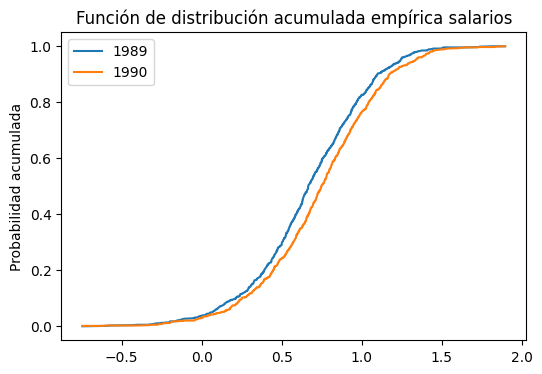

In [13]:
# Ajuste de las funciones ecdf con cada muestra
ecdf_1989 = ECDF(datos.loc[datos.year == '1989', 'salary'])
ecdf_1990 = ECDF(datos.loc[datos.year == '1990', 'salary'])

# Estimación de la probabilidad acumulada de cada valor de salario observado
grid_salario = np.sort(datos.salary.unique())
prob_acumulada_ecdf_1989 = ecdf_1989(grid_salario)
prob_acumulada_ecdf_1990 = ecdf_1990(grid_salario)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(grid_salario, prob_acumulada_ecdf_1989, label='1989')
ax.plot(grid_salario, prob_acumulada_ecdf_1990, label='1990')
ax.set_title("Función de distribución acumulada empírica salarios")
ax.set_ylabel("Probabilidad acumulada")
ax.legend()
plt.show()

In [14]:
# Distancia Kolmogorov–Smirnov
abs_dif = np.abs(prob_acumulada_ecdf_1989 - prob_acumulada_ecdf_1990)
distancia_ks = np.max(abs_dif)
print(f"Distancia Kolmogorov–Smirnov: {distancia_ks :.4f}")

Distancia Kolmogorov–Smirnov: 0.1057


In [15]:
# Test Kolmogorov–Smirnov entre dos muestras
ks_2samp(
    datos.loc[datos.year == '1989', 'salary'],
    datos.loc[datos.year == '1990', 'salary']
)

KstestResult(statistic=0.10569105691056911, pvalue=0.0005205845230085144, statistic_location=0.6692902, statistic_sign=1)

* Existen evidencias suficientes para considerar que la distribución de salarios ha variado de un año a otro.